# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [210]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
# Create a new dataframe from your CSV
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [211]:
# Print out any information you need to understand your dataframe
df.head(10)

Clothing ID  Age                                 Title  \
0          767   33                                   NaN   
1         1080   34                                   NaN   
2         1077   60               Some major design flaws   
3         1049   50                      My favorite buy!   
4          847   47                      Flattering shirt   
5         1080   49               Not for the very petite   
6          858   39                  Cagrcoal shimmer fun   
7          858   39  Shimmer, surprisingly goes with lots   
8         1077   24                            Flattering   
9         1077   34                     Such a fun dress!   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   
7  I ordered this in carbon for store pick up, an...       4                1   
8  I love this dress. i usually get an xs but it ...       5                1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
5                        4         General         Dresses    Dresses  
6                        1  General Petite            Tops      Knits  
7                        4  General Petite            Tops      Knits  
8                        0         General         Dresses    Dresses  
9                        0         General         Dresses    Dresses

In [3]:
df.shape

(23486, 10)

In [4]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [116]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count'],
      dtype='object')
Index(['Title', 'Review Text', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

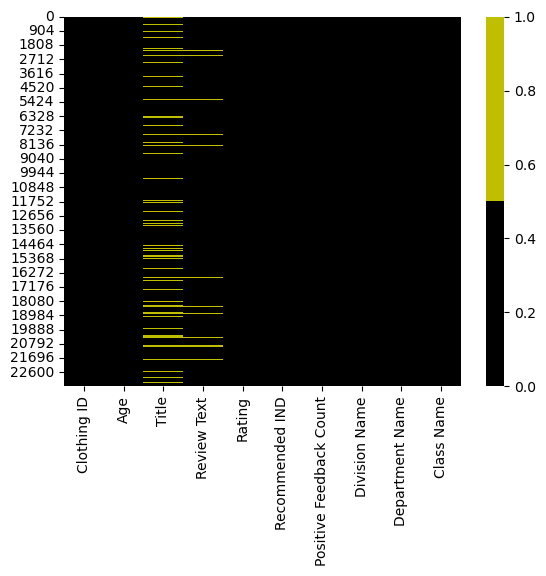

In [71]:
# Plot a heatmap of any missing data

cols = df.columns
colours = ['k', 'y'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [141]:
# Try out a missing data percentage list! 

percentage_missing = df.isnull().mean()
print(percentage_missing)

Clothing ID                0.000000
Age                        0.000000
Title                      0.162224
Review Text                0.035979
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.000596
Department Name            0.000596
Class Name                 0.000596
dtype: float64


<AxesSubplot:>

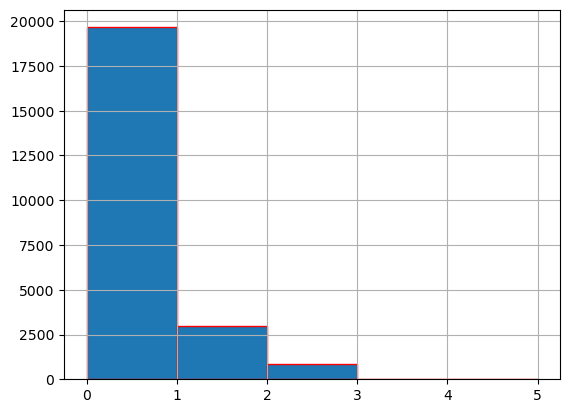

In [140]:
# Plot a missing data histogram

missing_by_row = df.isnull().sum(axis='columns')
missing_by_row.hist(bins=5,edgecolor = 'r',linewidth = 1)


In [106]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [179]:
# Handle any missing data in your dataframe.
percentage_missing[percentage_missing > .1]   # There is a 'Title' column with 10% missing values.
drop_missing_df = df.drop(columns = percentage_missing[percentage_missing > .1].index)
drop_missing_df

Clothing ID  Age                                        Review Text  \
0              767   33  Absolutely wonderful - silky and sexy and comf...   
1             1080   34  Love this dress!  it's sooo pretty.  i happene...   
2             1077   60  I had such high hopes for this dress and reall...   
3             1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4              847   47  This shirt is very flattering to all due to th...   
...            ...  ...                                                ...   
23481         1104   34  I was very happy to snag this dress at such a ...   
23482          862   48  It reminds me of maternity clothes. soft, stre...   
23483         1104   31  This fit well, but the top was very see throug...   
23484         1084   28  I bought this dress for a wedding i have this ...   
23485         1104   52  This dress in a lovely platinum is feminine an...   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
0           4                1                        0       Initmates   
1           5                1                        4         General   
2           3                0                        0         General   
3           5                1                        0  General Petite   
4           5                1                        6         General   
...       ...              ...                      ...             ...   
23481       5                1                        0  General Petite   
23482       3                1                        0  General Petite   
23483       3                0                        1  General Petite   
23484       3                1                        2         General   
23485       5                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 9 columns]

In [185]:
df[non_numeric_cols].isnull().sum()


Title              3810
Review Text         845
Division Name        14
Department Name      14
Class Name            0
dtype: int64

In [186]:
#impute the non-numeric columns with their most frequent values

most_freq = df['Review Text'].describe().loc['top']
most_freq

"Perfect fit and i've gotten so many compliments. i buy all my suits from here now!"

In [188]:
#Fill in the missing

df['Review Text'] = df['Review Text'].fillna(most_freq)
df['Review Text'].isnull().sum()

0

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

In [194]:
# Finding Outliers
# df.kurt(numeric_only=True)[:10]
df.describe()

Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000

In [ ]:
#For the column ' Positive Feedback Count', we can see that the maximum value is 122, while the 75th percentile is only 3. The maximum value is an outlier.

<AxesSubplot:>

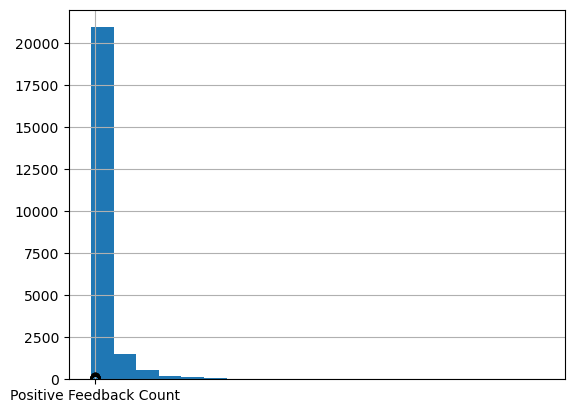

In [198]:
# Plot a histogram to see if there are any outliers.

df['Positive Feedback Count'].hist(bins=20)

df.boxplot(column=['Positive Feedback Count'])

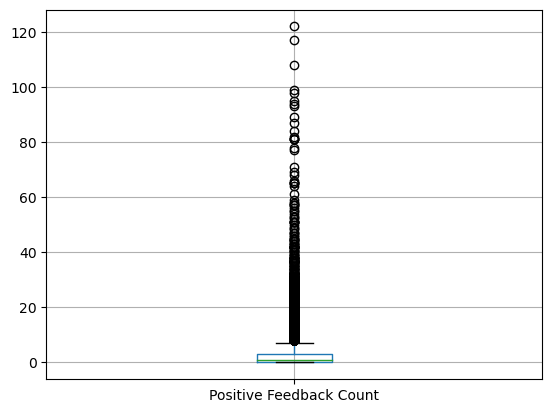

In [199]:
#see outliers using boxplot
boxplot = df.boxplot(column=['Positive Feedback Count'])  

In [12]:
# Use the describe() method
df.describe()

Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000

<AxesSubplot:>

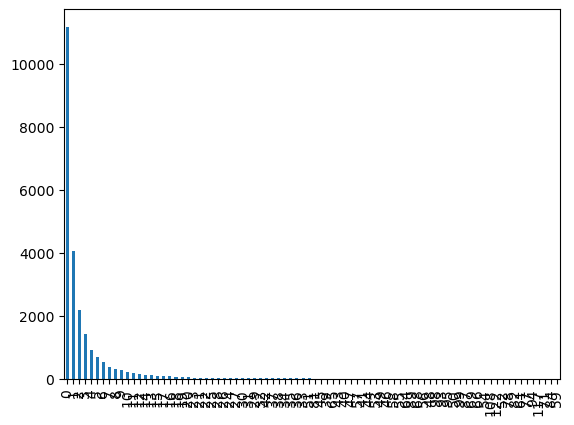

In [200]:
# Plot a bar chart

df['Positive Feedback Count'].value_counts().plot(kind='bar')

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [201]:
# Handle any outliers in your dataframe

#75% of 'Positive Feedback Count' is 3.but maximum is 122.Only 25% lies in between 3 to 122. 
#it seems this is not affecting the dataset much. 
#so we are not dropping or replacing the outlier.
#we are just going to keep the outliers as it is.


## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [209]:
# Look for any irrelevant data in the dataframe. How will you handle it?

df.drop(columns = ['Recommended IND'])

# This 'Recommended IND' column is having irrelevant data in that. so dropping this 'Recommended IND'.


Clothing ID  Age                                        Review Text  \
0              767   33  Absolutely wonderful - silky and sexy and comf...   
1             1080   34  Love this dress!  it's sooo pretty.  i happene...   
2             1077   60  I had such high hopes for this dress and reall...   
3             1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4              847   47  This shirt is very flattering to all due to th...   
...            ...  ...                                                ...   
23481         1104   34  I was very happy to snag this dress at such a ...   
23482          862   48  It reminds me of maternity clothes. soft, stre...   
23483         1104   31  This fit well, but the top was very see throug...   
23484         1084   28  I bought this dress for a wedding i have this ...   
23485         1104   52  This dress in a lovely platinum is feminine an...   

       Rating  Positive Feedback Count   Division Name Class Name  
0           4                        0       Initmates  Intimates  
1           5                        4         General    Dresses  
2           3                        0         General    Dresses  
3           5                        0  General Petite      Pants  
4           5                        6         General    Blouses  
...       ...                      ...             ...        ...  
23481       5                        0  General Petite    Dresses  
23482       3                        0  General Petite      Knits  
23483       3                        1  General Petite    Dresses  
23484       3                        2         General    Dresses  
23485       5                       22  General Petite    Dresses  

[23486 rows x 7 columns]

In [47]:
# Look for duplicates. How will you handle any duplicates?
drop_duplicates = df[df.duplicated()]

In [48]:
drop_duplicates.shape

(21, 10)

In [49]:
df.drop_duplicates()

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23465 rows x 10 columns]

In [31]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
df.drop(['Title','Recommended IND','Department Name'],axis=1)


Clothing ID  Age                                        Review Text  \
0              767   33  Absolutely wonderful - silky and sexy and comf...   
1             1080   34  Love this dress!  it's sooo pretty.  i happene...   
2             1077   60  I had such high hopes for this dress and reall...   
3             1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4              847   47  This shirt is very flattering to all due to th...   
...            ...  ...                                                ...   
23481         1104   34  I was very happy to snag this dress at such a ...   
23482          862   48  It reminds me of maternity clothes. soft, stre...   
23483         1104   31  This fit well, but the top was very see throug...   
23484         1084   28  I bought this dress for a wedding i have this ...   
23485         1104   52  This dress in a lovely platinum is feminine an...   

       Rating  Positive Feedback Count   Division Name Class Name  
0           4                        0       Initmates  Intimates  
1           5                        4         General    Dresses  
2           3                        0         General    Dresses  
3           5                        0  General Petite      Pants  
4           5                        6         General    Blouses  
...       ...                      ...             ...        ...  
23481       5                        0  General Petite    Dresses  
23482       3                        0  General Petite      Knits  
23483       3                        1  General Petite    Dresses  
23484       3                        2         General    Dresses  
23485       5                       22  General Petite    Dresses  

[23486 rows x 7 columns]

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [19]:
# Try to convert all the strings in a column to lower or upper case. 
df['Review Text'].str.lower()

0        absolutely wonderful - silky and sexy and comf...
1        love this dress!  it's sooo pretty.  i happene...
2        i had such high hopes for this dress and reall...
3        i love, love, love this jumpsuit. it's fun, fl...
4        this shirt is very flattering to all due to th...
                               ...                        
23481    i was very happy to snag this dress at such a ...
23482    it reminds me of maternity clothes. soft, stre...
23483    this fit well, but the top was very see throug...
23484    i bought this dress for a wedding i have this ...
23485    this dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object